<a href="https://colab.research.google.com/github/polina-minaeva/working-with-variables/blob/main/%D0%A0%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D1%81_%D0%BF%D0%B5%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%BC%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Получение данных и загрузка в рабочую среду

In [ ]:
#1) Импортировала пандас для создания датафрейма

import pandas as pd

In [ ]:
#2) Импортировала датасет с недвижимостью Калифорнии из sklearn

from sklearn.datasets import fetch_california_housing

In [ ]:
calif = fetch_california_housing()

In [ ]:
print(calif.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
calif.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [ ]:
#3) Создала датафрейм из импортированного датасета
calif_homes = pd.DataFrame(calif.data, columns=calif.feature_names)
calif_homes_tagr = calif.target

In [ ]:
calif_homes.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


2. Проверка данных на наличие пропусков

In [ ]:
#4) Проверила наличие пропусков

calif_homes.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

3. Разделение выборки на обучающее и тестовое подмножества

In [ ]:
#5) Разделила выборку на трейн и тест

In [ ]:
X = calif_homes

In [ ]:
y = calif_homes_tagr

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4. Построение модели линейной регрессии. Вычисление метрик RMSE и R2

In [ ]:
#6) Запустила модель линейной регрессии

In [ ]:
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
#7) Проверила метрики RMSE и R2

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test, y_pred, squared=False)

0.7455813830127764

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test, y_pred)

0.5757877060324508

5. Построение графика распределения целевой переменной

In [ ]:
#8) Построила график распределения целевой переменной для проверки выбросов

In [ ]:
import seaborn as sns

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 5,7

In [ ]:
y_for_pl = pd.DataFrame(data=y)

In [ ]:
y_for_pl

,0
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


<Axes: >

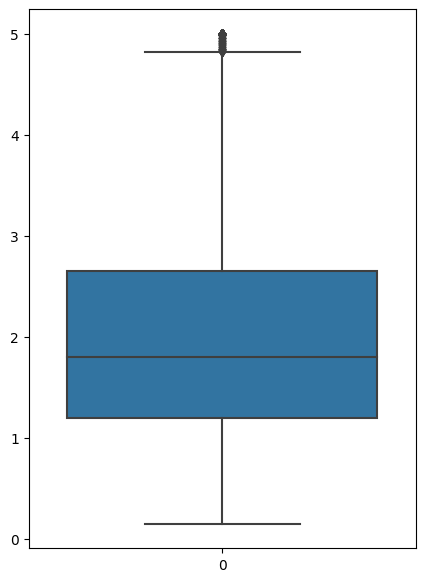

In [ ]:
sns.boxplot(data=y_for_pl)

Как видно по ящику с усами, выбросы в данных находятся у отметки 5.

6. Выведение корреляционной матрицы. Удаление сильно коррелирующих признаков

In [ ]:
#9) Запустила корреляционную матрицу для возможного удаления сильно корррелирующих признаков

In [ ]:
cor_mat = calif_homes.corr()

In [ ]:
cor_mat.style.background_gradient(cmap='RdYlGn')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


In [ ]:
#10) Удалила признак AveBedrms, силньо кррелирующий с AveRooms

In [ ]:
calif_homes_2 = calif_homes.drop('AveBedrms', axis=1)
calif_homes_2.head()

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,565.0,2.181467,37.85,-122.25


In [ ]:
X2 = calif_homes_2

In [ ]:
#11) Запустила модель с удаленным признаком

In [ ]:
model2 = LinearRegression()

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=42)

model2.fit(X_train2, y_train2)

LinearRegression()

In [ ]:
y_pred2 = model2.predict(X_test2)

In [ ]:
mean_squared_error(y_test2, y_pred2, squared=False)

0.7398151789804083

In [ ]:
r2_score(y_test2, y_pred2)

0.5823239094526445

7. Исследование оставленных признаков на выбросы. Удаление выбросов

In [ ]:
#12) Построила график ящик с усами для выявления выбросов

In [ ]:
rcParams['figure.figsize'] = 18,7

<Axes: >

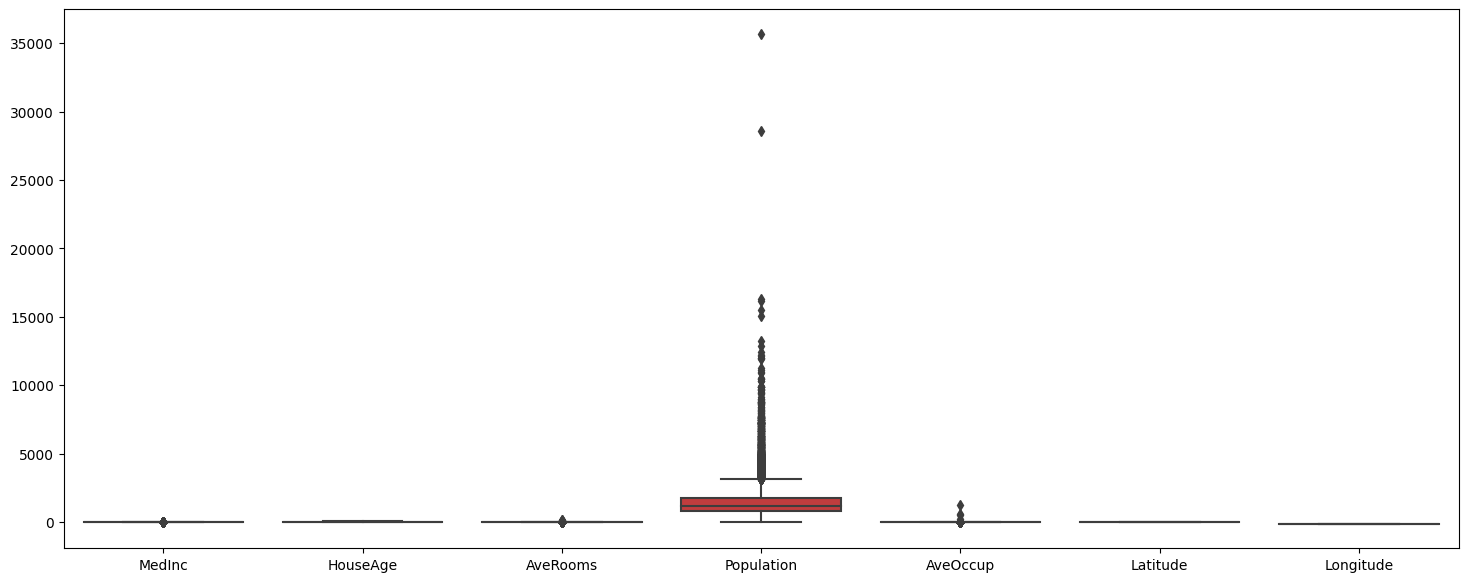

In [ ]:
sns.boxplot(data=X2)

In [ ]:
#13) Удалила выбросы в Population

new_df_3 = X2
new_df_3

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,741.0,2.123209,39.43,-121.32


In [ ]:
new_df_3['Y'] = y
new_df_3

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,Y
0,8.3252,41.0,6.984127,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
new_df_3 = new_df_3[new_df_3['Population'] < 20000.0]
new_df_3

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,Y
0,8.3252,41.0,6.984127,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
y3 = new_df_3['Y']

In [ ]:
X3 = new_df_3.drop('Y', axis=1)
X3

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,741.0,2.123209,39.43,-121.32


<Axes: >

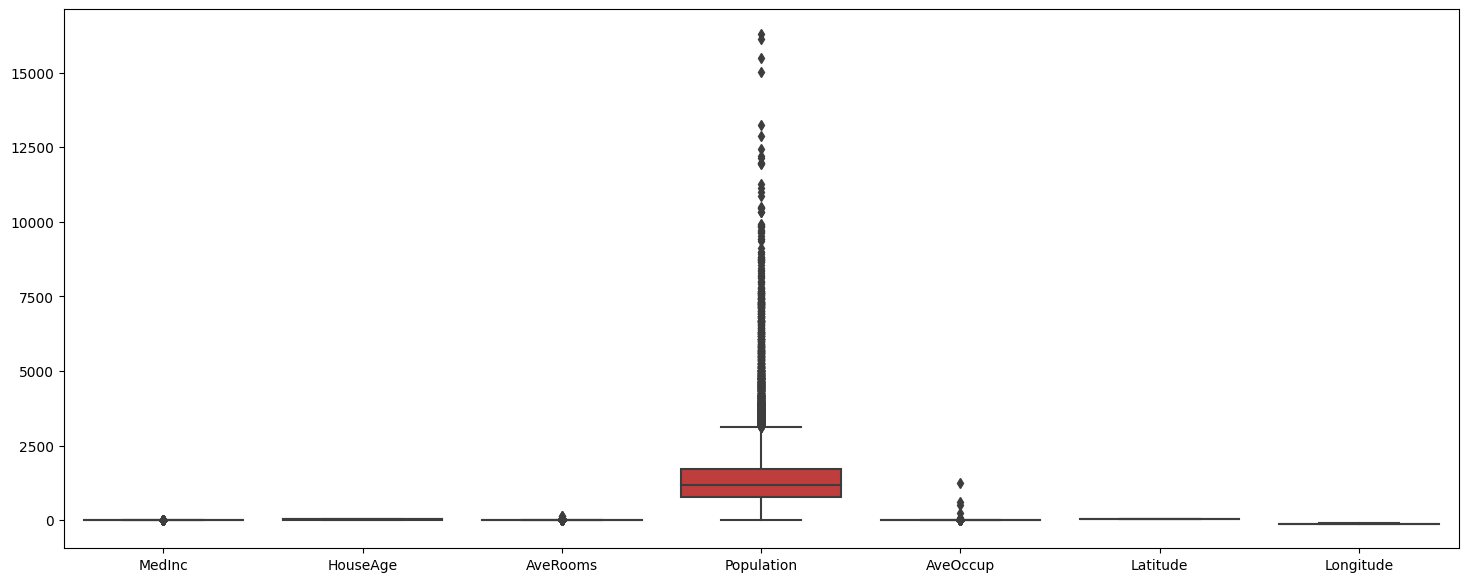

In [ ]:
sns.boxplot(data=X3)

In [ ]:
#14) Построила модель с удаленными выбросами

model3 = LinearRegression()

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

model3.fit(X_train3, y_train3)

LinearRegression()

In [ ]:
y_pred3 = model3.predict(X_test3)

In [ ]:
mean_squared_error(y_test3, y_pred3, squared=False)

0.7341536609116661

In [ ]:
r2_score(y_test3, y_pred3)

0.5964227100599084

8. Математическое изменение признаков (вычисление логарифмов и нахождение квадратного корня)

In [ ]:
#16) Логарифмировала MedInc и вычислила корень из AveRooms, создала новые признаки

In [ ]:
X3.head()

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,565.0,2.181467,37.85,-122.25


In [ ]:
import numpy as np

In [ ]:
X3['log_medinc'] = np.log(X3['MedInc'])

In [ ]:
X3

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,log_medinc
0,8.3252,41.0,6.984127,322.0,2.555556,37.88,-122.23,2.119287
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86,-122.22,2.116424
2,7.2574,52.0,8.288136,496.0,2.802260,37.85,-122.24,1.982022
3,5.6431,52.0,5.817352,558.0,2.547945,37.85,-122.25,1.730434
4,3.8462,52.0,6.281853,565.0,2.181467,37.85,-122.25,1.347086
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,845.0,2.560606,39.48,-121.09,0.444878
20636,2.5568,18.0,6.114035,356.0,3.122807,39.49,-121.21,0.938756
20637,1.7000,17.0,5.205543,1007.0,2.325635,39.43,-121.22,0.530628
20638,1.8672,18.0,5.329513,741.0,2.123209,39.43,-121.32,0.624440


In [ ]:
X3['sqrt_averooms'] = np.sqrt(X3['AveRooms'])

In [ ]:
X3

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,log_medinc,sqrt_averooms
0,8.3252,41.0,6.984127,322.0,2.555556,37.88,-122.23,2.119287,2.642750
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86,-122.22,2.116424,2.497626
2,7.2574,52.0,8.288136,496.0,2.802260,37.85,-122.24,1.982022,2.878912
3,5.6431,52.0,5.817352,558.0,2.547945,37.85,-122.25,1.730434,2.411919
4,3.8462,52.0,6.281853,565.0,2.181467,37.85,-122.25,1.347086,2.506363
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,845.0,2.560606,39.48,-121.09,0.444878,2.246209
20636,2.5568,18.0,6.114035,356.0,3.122807,39.49,-121.21,0.938756,2.472657
20637,1.7000,17.0,5.205543,1007.0,2.325635,39.43,-121.22,0.530628,2.281566
20638,1.8672,18.0,5.329513,741.0,2.123209,39.43,-121.32,0.624440,2.308574


In [ ]:
#17) Построила новую модель с добавленными признаками

In [ ]:
model4 = LinearRegression()

X_train4, X_test4, y_train4, y_test4 = train_test_split(X3, y3, test_size=0.2, random_state=42)

model4.fit(X_train4, y_train4)

LinearRegression()

In [ ]:
y_pred4 = model4.predict(X_test4)

In [ ]:
mean_squared_error(y_test4, y_pred4, squared=False)

0.7350418074875555

In [ ]:
r2_score(y_test4, y_pred4)

0.5954456595672621

Итог

Построена модель линейной регрессии для предсказания средней ценности дома MedHouseVal, которую удалось улучшить с помощью преобразования данных, а именно: удаления коррелирующих признаков, удаления выбросов и после математических преобразований.

Путем преобразования данных, в целом, удалось добиться улучшения метрики R2

1) До преобразований: 0.5757877060324508

2) После удаления коррелирующих признаков: 0.5823239094526445

3) После удаления выбросов: 0.5964227100599084

4) После математических преобразований: 0.5954456595672621

При этом метрика RMSE чуть просела, но с введением мат.преобразований улучшилась:

1) 0.7455813830127764

2) 0.7398151789804083

3) 0.7341536609116661

4) 0.7350418074875555